## Create a Linear regression model using Python/R to predict home prices using Boston Housing Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [5]:
boston = load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
bostondf['MEDV'] = boston.target

In [14]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
sns.set_color_codes()

C:\Users\Tanmay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


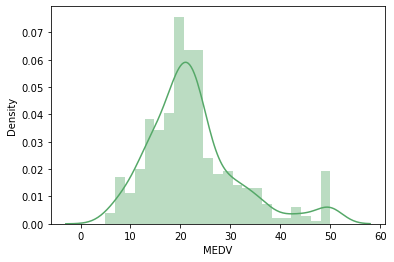

In [17]:
ax = sns.distplot(bostondf['MEDV'], color='g')

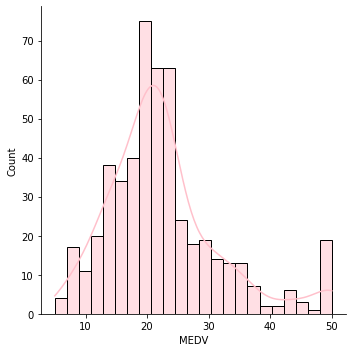

In [18]:
ax = sns.displot(bostondf['MEDV'], color='pink', kde=True)

In [19]:
cormat = bostondf.corr().round(2)

In [20]:
sns.set(rc={'figure.figsize':(20,15)})

<AxesSubplot:>

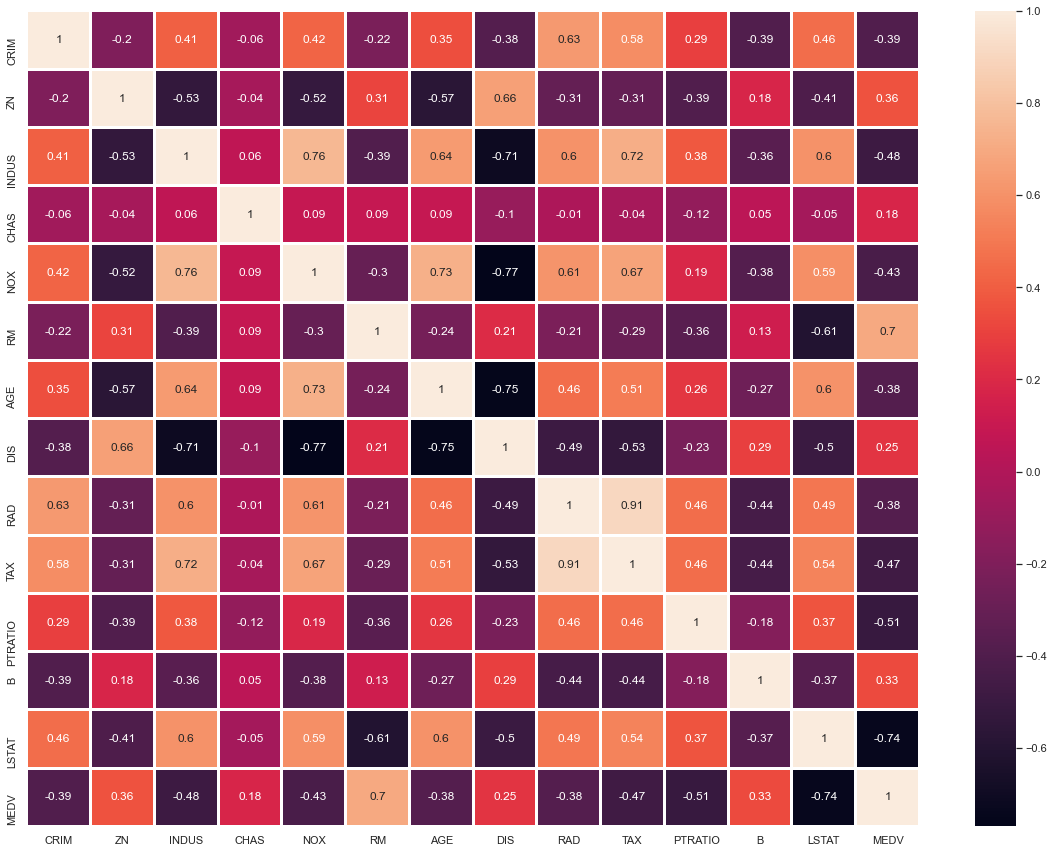

In [21]:
sns.heatmap(data = cormat, annot=True, linewidths=2)

In [22]:
sns.set(rc={'figure.figsize':(8,6)})

Text(0, 0.5, 'MEDV')

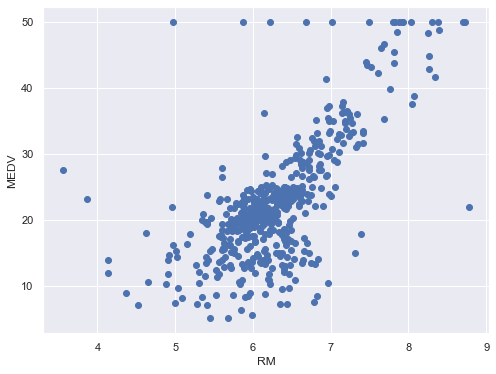

In [23]:
plt.scatter(bostondf['RM'],bostondf['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

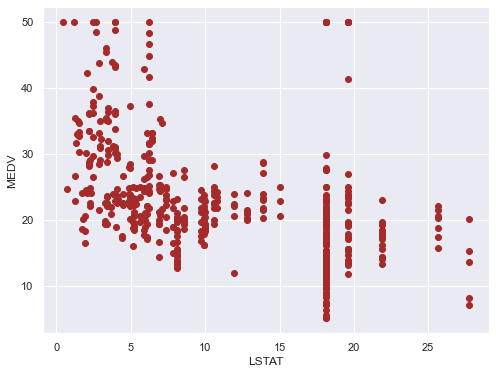

In [24]:
plt.scatter(bostondf['INDUS'],bostondf['MEDV'], c='brown')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

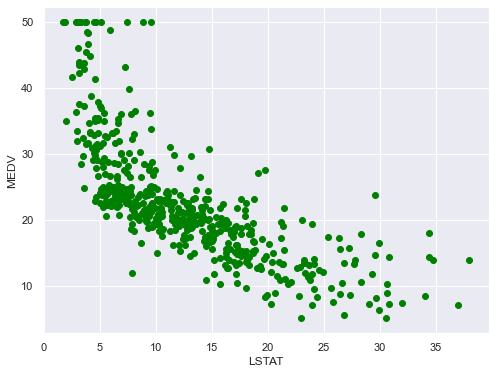

In [25]:
plt.scatter(bostondf['LSTAT'],bostondf['MEDV'], c='green')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [26]:
X = pd.DataFrame(np.c_[bostondf['LSTAT'], bostondf['RM']], columns = ['LSTAT','RM'])

In [27]:
Y = bostondf['MEDV']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [29]:
X_train.shape

(379, 2)

In [30]:
X_test.shape

(127, 2)

In [31]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [34]:
y_train_predict = lin_model.predict(X_train)
y_test_predict = lin_model.predict(X_test)
rms_error = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse = mean_squared_error(Y_test, y_test_predict)


In [35]:
rms_error

5.54641685351987

In [36]:
import statistics

In [37]:
statistics.stdev(y_test_predict)/len(y_test_predict)

0.05434786749035184

In [ ]:
lin_model.score()